<a href="https://colab.research.google.com/github/anasofiatoro/ENTREGA-2/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od


In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/udea-ai4eng-20242'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anasofiatorolastra
Your Kaggle Key: ··········


100%|██████████| 20.1M/20.1M [00:00<00:00, 203MB/s]


Extracting archive ./udea-ai4eng-20242/udea-ai4eng-20242.zip to ./udea-ai4eng-20242


In [ ]:
import os
os.chdir('/content/udea-ai4eng-20242')
os.listdir()

['test.csv', 'submission_example.csv', 'train.csv']

In [ ]:
import pandas as pd
archivo= "train.csv"
pd.read_csv(archivo)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,No,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Si,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,Primaria completa,Si,bajo


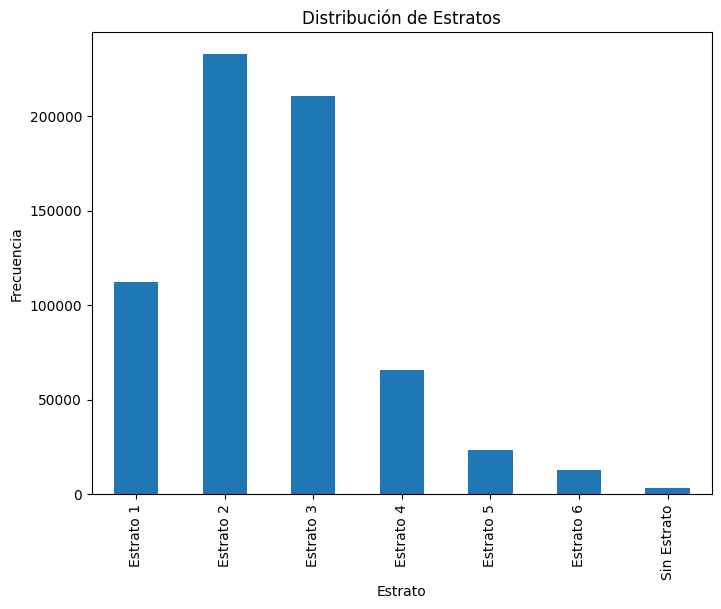

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

column_name = 'FAMI_ESTRATOVIVIENDA'

plt.figure(figsize=(8,6))
df[column_name].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Estratos')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()


Nueva sección

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargamos el dataset
df = pd.read_csv('train.csv')

In [ ]:
# Verificamos las columnas categóricas que contienen strings
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {categorical_columns}")

Columnas categóricas: Index(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')


In [ ]:
# Revisamos las columnas con valores numéricos pero almacenados como texto
print(df['ESTU_VALORMATRICULAUNIVERSIDAD'].unique())

['Entre 5.5 millones y menos de 7 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones' 'Más de 7 millones'
 'Entre 1 millón y menos de 2.5 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'No pagó matrícula' nan]


In [ ]:
# Mapeamos los valores de la columna 'ESTU_VALORMATRICULAUNIVERSIDAD' a valores numéricos
valormatricula_map = {
    'Entre 500 mil y menos de 1 millón': 0.75,
    'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25
}

df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].map(valormatricula_map)

In [ ]:
# Verificamos si hay valores nulos después de la conversión
print(df['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum())

174092


In [ ]:
# Convertimos el resto de las columnas categóricas en one-hot encoding
df_final = pd.get_dummies(df, drop_first=True)

In [ ]:
# Normalizamos las columnas numéricas
numerical_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Normalizamos utilizando StandardScaler
scaler = StandardScaler()
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

print("\nDataset con variables numéricas normalizadas:")
print(df_final.head())


Dataset con variables numéricas normalizadas:
         ID   PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  \
0  1.434424  1.294094                        2.238811   
1  0.527513  1.294094                        0.344422   
2 -0.652132  0.439801                        0.344422   
3 -0.084924 -0.319570                        1.291616   
4  1.731274  1.294094                        0.344422   

   ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   ESTU_PRGM_ACADEMICO_ACUICULTURA  ESTU_PRGM_ACADEMICO_ADMINISTRACION  \
0                            False                               False   
1                            False                               False   
2                            False                               Fals

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Imputar datos faltantes solo en las columnas numéricas utilizando la mediana
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Mostrar cuántos valores faltantes quedan en el dataset (si quedan)
print(df.isnull().sum())


ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD        0
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
RENDIMIENTO_GLOBAL                    0
dtype: int64
